In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cluster import KMeans

In [10]:
x1 = pd.ExcelFile("MILLET27072023.xlsx")
PE = x1.parse("MM_PE")
RA = x1.parse("MM_RA")
SO = x1.parse("MM_SO")

col = list(PE.columns)
labels = []
for c in col:
    labels.append(c[:8])

col = list(RA.columns)
for c in col:
    labels.append(c[:8])

col = list(SO.columns)
for c in col:
    labels.append(c[:8])

labels = set(labels)
labels = list(labels)
labels.sort()
labels

['MM_PE_01',
 'MM_PE_02',
 'MM_PE_03',
 'MM_PE_04',
 'MM_PE_05',
 'MM_PE_06',
 'MM_PE_07',
 'MM_RA_01',
 'MM_RA_02',
 'MM_RA_03',
 'MM_RA_04',
 'MM_RA_05',
 'MM_RA_06',
 'MM_RA_07',
 'MM_RA_08',
 'MM_SO_01',
 'MM_SO_02',
 'MM_SO_03',
 'MM_SO_04',
 'MM_SO_05',
 'MM_SO_06',
 'MM_SO_07']

In [11]:
data = x1.parse("Combined")
data.head()

,labels,1,2,3,4,5,6,7,8,9,...,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900
0,1,0.119749,0.122435,0.123814,0.124852,0.124838,0.122965,0.122737,0.123346,0.120188,...,0.764164,0.763621,0.763154,0.761675,0.759046,0.756992,0.756328,0.755638,0.753958,0.751808
1,1,0.124639,0.124226,0.122119,0.122571,0.125007,0.125840,0.126786,0.128309,0.126941,...,0.766045,0.764943,0.763496,0.761597,0.759991,0.758496,0.756808,0.755449,0.755036,0.754704
2,1,0.124573,0.126740,0.127505,0.128693,0.130397,0.130971,0.129217,0.126737,0.124588,...,0.765359,0.764158,0.761340,0.758494,0.757217,0.756878,0.755977,0.754408,0.753026,0.752026
3,2,0.122445,0.122395,0.121356,0.123565,0.125378,0.124643,0.124072,0.126101,0.128683,...,0.736280,0.736014,0.735425,0.733659,0.731292,0.729275,0.727942,0.726589,0.724810,0.722928
4,2,0.124994,0.124373,0.122300,0.121438,0.121113,0.119963,0.121676,0.126670,0.128343,...,0.738679,0.737267,0.735770,0.734690,0.733759,0.732740,0.731301,0.729252,0.727026,0.724831


In [12]:
lab = data.values[:,0].astype('uint8') 
lab

array([ 1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  5,  6,  6,
        6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11, 11, 11, 12,
       12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16, 17, 17, 17,
       18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22, 22],
      dtype=uint8)

In [13]:
feat = data.values[:,1:]
dfeat = savgol_filter(feat, 25, polyorder = 5, deriv=1)
dfeat

array([[ 0.00489306,  0.00234087,  0.00062549, ..., -0.00148298,
        -0.00157184, -0.00170976],
       [ 0.00283183,  0.00121083,  0.00020409, ..., -0.00103982,
        -0.00077946, -0.00046411],
       [ 0.00686981,  0.00350561,  0.00115492, ..., -0.00118876,
        -0.00105584, -0.00091343],
       ...,
       [-0.00268269, -0.00171241, -0.0008387 , ..., -0.00071963,
         0.00027056,  0.00164729],
       [-0.00255563, -0.00130249, -0.00037971, ..., -0.00154301,
        -0.00185961, -0.00227843],
       [ 0.00041123, -0.00018266, -0.00042791, ..., -0.00137749,
        -0.00122692, -0.00097711]])

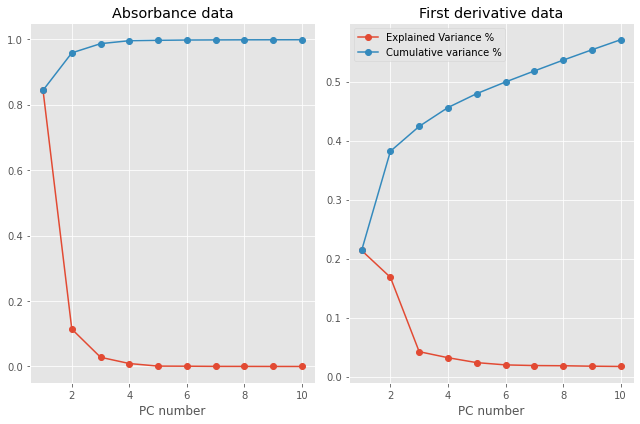

In [14]:
nc = 10
pca1 = pca(n_components=nc)
pca2 = pca(n_components=nc)
 
# Scale the features to have zero mean and standard devisation of 1
# This is important when correlating data with very different variances
nfeat1 = StandardScaler().fit_transform(feat)
nfeat2 = StandardScaler().fit_transform(dfeat)
 
# Fit the spectral data and extract the explained variance ratio
X1 = pca1.fit(nfeat1)
expl_var_1 = X1.explained_variance_ratio_
 
# Fit the first data and extract the explained variance ratio
X2 = pca2.fit(nfeat2)
expl_var_2 = X2.explained_variance_ratio_
 
# Plot data
pc_array = np.linspace(1,nc,nc)
with plt.style.context(('ggplot')):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,6))
    fig.set_tight_layout(True)
 
    ax1.plot(pc_array, expl_var_1,'-o', label="Explained Variance %")
    ax1.plot(pc_array, np.cumsum(expl_var_1),'-o', label = 'Cumulative variance %')
    ax1.set_xlabel("PC number")
    ax1.set_title('Absorbance data')
 
    ax2.plot(pc_array, expl_var_2,'-o', label="Explained Variance %")
    ax2.plot(pc_array, np.cumsum(expl_var_2),'-o', label = 'Cumulative variance %')
    ax2.set_xlabel("PC number")
    ax2.set_title('First derivative data')
 
    plt.legend()
    plt.show()

In [15]:
pca2 = pca(n_components=4)
 
# Transform on the scaled features
Xt2 = pca2.fit_transform(nfeat2)

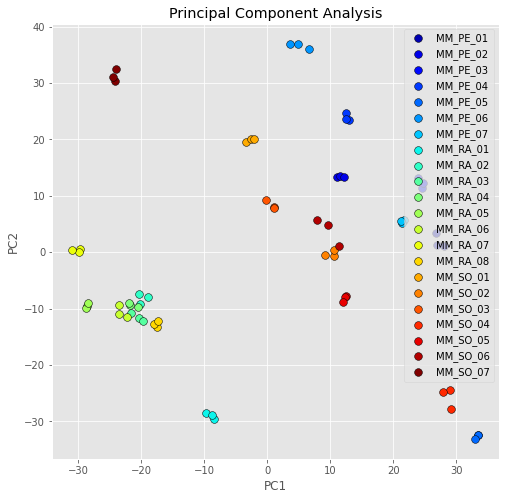

In [16]:
labplot = labels
 
# Scatter plot
unique = list(set(lab))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8, 8))
    for i, u in enumerate(unique):
        col = np.expand_dims(np.array(colors[i]), axis=0)
        xi = [Xt2[j,0] for j in range(len(Xt2[:,0])) if lab[j] == u]
        yi = [Xt2[j,1] for j in range(len(Xt2[:,1])) if lab[j] == u]
        plt.scatter(xi, yi, c=col, s=60, edgecolors='k',label=str(u))
 
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(labplot,loc='upper right')
    plt.title('Principal Component Analysis')
    plt.show()

In [22]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
 
x1 = pd.ExcelFile("MILLET27072023.xlsx")
labels = x1.sheet_names[1:]
data = x1.parse("Combined")
 
y = data.values[:,0].astype('uint8')
X = data.values[:,1:]
 
lda = LDA(n_components=4)
Xlda = lda.fit_transform(X,y)

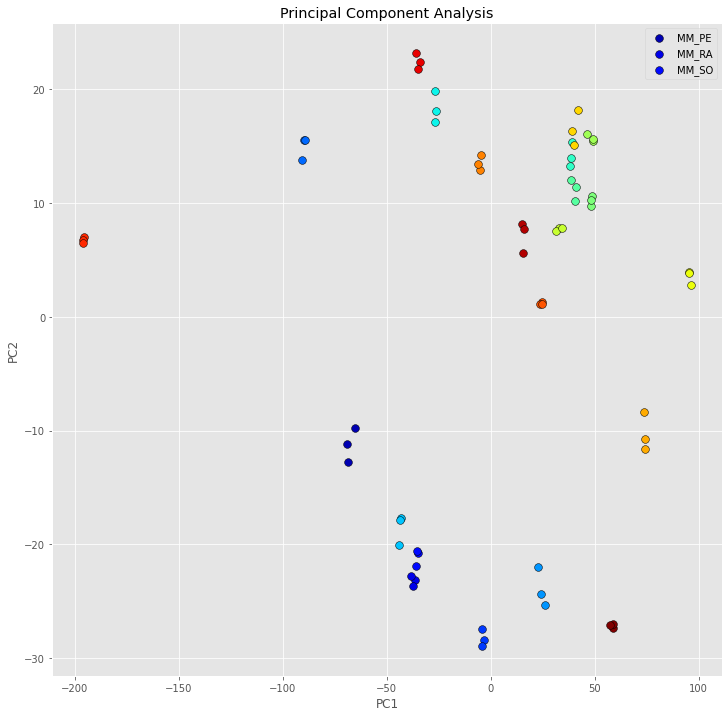

In [23]:
labplot = labels
 
# Scatter plot
unique = list(set(lab))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
with plt.style.context(('ggplot')):
    plt.figure(figsize=(12, 12))
    for i, u in enumerate(unique):
        col = np.expand_dims(np.array(colors[i]), axis=0)
        xi = [Xlda[j,0] for j in range(len(Xlda[:,0])) if lab[j] == u]
        yi = [Xlda[j,1] for j in range(len(Xlda[:,1])) if lab[j] == u]
        plt.scatter(xi, yi, c=col, s=60, edgecolors='k',label=str(u))
 
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(labplot,loc='upper right')
    plt.title('Principal Component Analysis')
    plt.show()

In [19]:

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
 
lda = LDA()
lda.fit(X_train,y_train)
 
y_pred = lda.predict(X_test)
print(lda.score(X_test,y_test))

1.0


In [24]:
scores = cross_val_score(LDA(), X, y, cv=2)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.0000 (+/- 0.0000)


In [25]:
pca = pca(n_components=15)
Xpc = pca.fit_transform(X)
scores = cross_val_score(LDA(), Xpc, y, cv=2)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.0000 (+/- 0.0000)
